# The Sparks Foundation - GRIP

# Name: Mainak Sanyal

Predict the percentage of an student based on the no. of study hours using Supervised ML

### Importing Libraries and Dataset

In [1]:
# Importing the essential libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading data from remote link

URL = "http://bit.ly/w-data"
data = pd.read_csv(URL)
print("Data imported successfully")

Data imported successfully


### Data Description

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

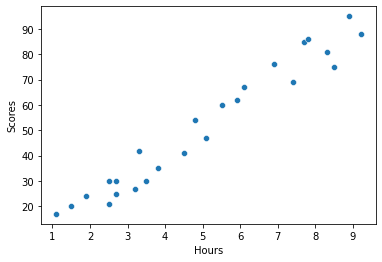

In [6]:
# Plotting the data points as a scatter plot to see the realtionship

sns.scatterplot(data=data, x='Hours', y='Scores')

In [7]:
# Correaltions between the two variable

data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is a positive linear relation between the number of hours studied and percentage of score.

### Preaparing the Data

In [8]:
# Preparing dependent and independent Data variable

x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [9]:
# Train test split 

from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

We have split our data into training and testing sets

### Training the Algorithm

In [10]:
# Importing Linear Regression Packages

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [11]:
lr.fit(x_train,y_train)
print('Model training on data is done')

Model training on data is done


Text(0, 0.5, 'Marks Obtained')

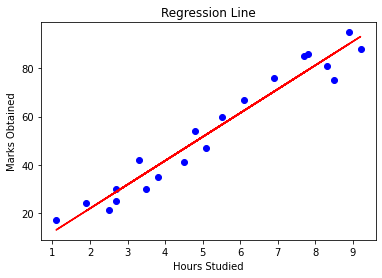

In [12]:
# Plotting the regression line on the scatter plot

rgline = lr.intercept_ + lr.coef_*x_train
plt.scatter(x_train, y_train, color='b')
plt.plot(x_train, rgline, color='r')
plt.title("Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Obtained")

### Making Predictions

In [13]:
# Testing data - In Hours

print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
# Predicting the scores for test data

y_pred = lr.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [15]:
# Comapring the actual values to values obtained by model

actual = list(y_test)
pred = list(y_pred)
df = pd.DataFrame({ 'Actual':actual,'Predicted':pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluating the model

In [16]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)
R2 = metrics.r2_score(y_test,y_pred)

print("Mean Squared Error      = ",mse)
print("Root Mean Squared Error = ",rmse)
print("Mean Absolute Error     = ",mae)
print("R squared value         = ",R2)

Mean Squared Error      =  21.5987693072174
Root Mean Squared Error =  4.6474476121003665
Mean Absolute Error     =  4.183859899002975
R squared value         =  0.9454906892105356


### Predicting Score if a student studies for 9.25 hrs/day

In [17]:
hours = 9.25
predicted_score = lr.predict([[hours]])
print("No of Hours studied = {}".format(hours))
print("Predicted score for a student studying",hours ,"hours is:",predicted_score)

No of Hours studied = 9.25
Predicted score for a student studying 9.25 hours is: [93.69173249]
